In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

# Random walk as giving correlations to independent random variables

So a 2D random walk can be generated via picking x, y displacements at random from a symmetric distribution (say, uniform with boundaries $(-\Delta_{max}, \Delta_{max})$) and then summing them up to generate a trajectory.

But this means the summing process introduces correlations into the process...

Start out by generating random variables for displacements in each step:

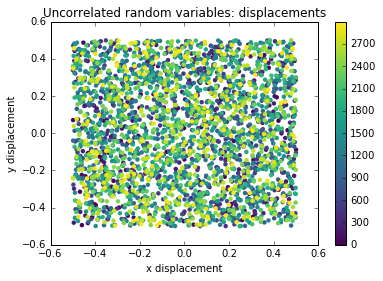

In [2]:
N = 3000
r = np.random.random((N,2)) - 0.5
x, y = r.T
T = np.arange(N)
plt.xlabel('x displacement')
plt.ylabel('y displacement')
plt.title('Uncorrelated random variables: displacements')
plt.scatter(x,y, c=T, linewidth=0, cmap = 'viridis')
plt.colorbar();

And then sum them along the first (time) axis to generate a random walk:

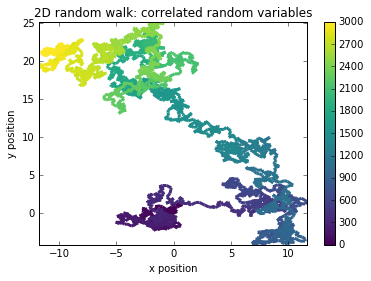

In [3]:
r_history = np.cumsum(r, axis=0)
xh, yh = r_history.T
max_time = len(xh)
T = np.arange(0, max_time)

# a continuously changing colored line plot
# http://matplotlib.org/examples/pylab_examples/multicolored_line.html
points = np.array([xh, yh]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('viridis'),
                    norm=plt.Normalize(0, max_time))
lc.set_array(T)
lc.set_linewidth(3)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(lc)
plt.colorbar(mappable=lc)

ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_xlim(xh.min(), xh.max())
ax.set_ylim(yh.min(), yh.max())
ax.set_title('2D random walk: correlated random variables');

But each of those positions in the random walk is a 2-vector. We could calculate the dot product between the positions at two different time steps and we'd get a measure of how much those two vectors overlap.

Given the following two pairs of 2-vectors:
```
[1    0]
[0.8  0.3]
```

```
[1  0]
[0 -1]
```

it is pretty clear that the first two, which point in roughly the same direction, have a relatively large overlap of $1 * 0.8 + 0 * 0.3 = 0.8$, whereas the second pair - pointing in completely perpendicular directions - will have no overlap whatsoever.

However, as time progresses, the vectors begin to grow in length. Each added random displacement is then more and more negligible compared to the overall vector length. That's going to be an issue, so let's normalize our vectors using the Cartesian sum-of-squares norm:
$$r_{n} = \frac{r}{||r||_2}$$

If we now calculate the overlap between **each** vector in time iteration:

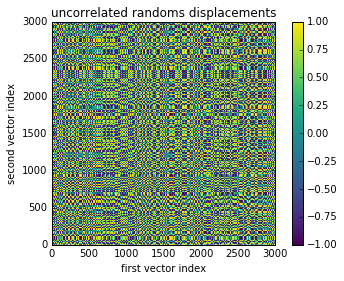

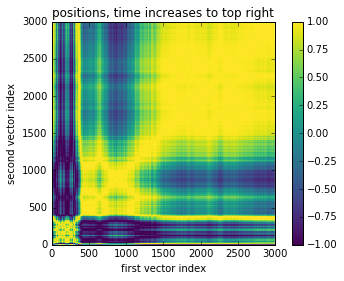

In [4]:
def correlations_matrix(r):
    """
    return correlations (as in, overlaps) between each 2-vector of (1000, 2) matrix
    normalizing the vectors to length 1
    
    here's a sequential code I wrote first
    
    result = np.zeros((len(r), len(r)))
    for i, v1 in enumerate(r):
        for j, v2 in enumerate(r):
            v1_normed = np.sqrt((v1**2).sum())
            v2_normed = np.sqrt((v2**2).sum())
            result[i, j] = v1_normed @ v2_normed
    return result
    
    
    the optimized version turns out to be slightly simpler... compare it yourself!
    """
    
    norm = np.sqrt((r**2).sum(axis=1))
    normed_r = r / norm[:, np.newaxis] #needs to be broadcast as (3000, 2) / (3000, ) fails
    return normed_r @ normed_r.T

def plot(m, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(m, origin='lower', interpolation='none', cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('first vector index')
    ax.set_ylabel('second vector index')
    plt.colorbar(im)
    plt.show()

plot(correlations_matrix(r), 'uncorrelated randoms displacements')
plot(correlations_matrix(r_history), 'positions, time increases to top right')

# The time evolution of a random walk is a process which introduces correlations between independent random variables!